In [1]:
import dataset
import matplotlib.pyplot as plt
import tree_search

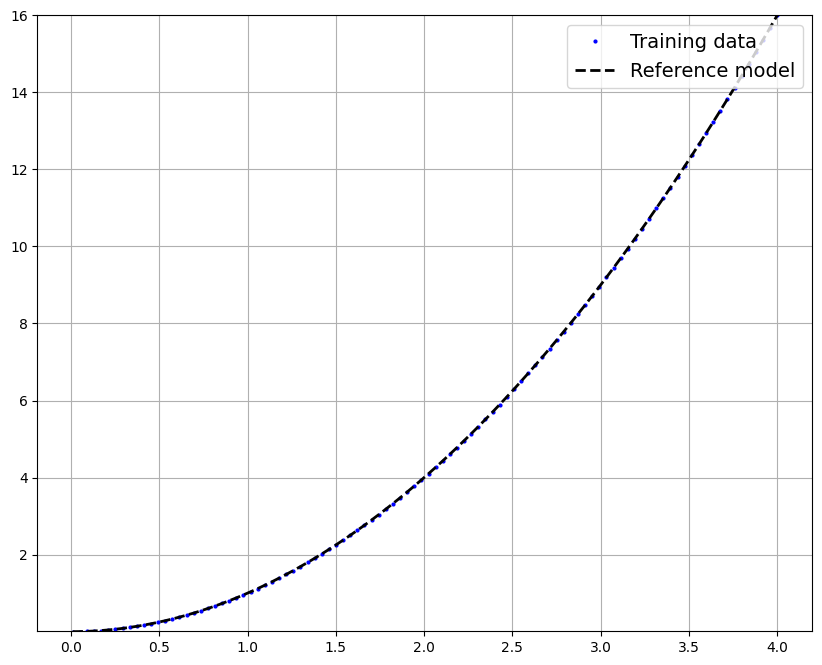

In [2]:
S = dataset.PolyDataset()
S.sample(size=100, noise=0.0, mesh=True)
S.plot()

In [3]:
avg, std = tree_search.compute_smoothness(S)
print(f"Avg: {avg}\nStd: {std}")

Avg: 4.01
Std: 2.3035100510415543


In [4]:
"""from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.es import ES
from pymoo.optimize import minimize

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=len(S.data), n_obj=1, xl=S.yl, xu=S.yu)

    def _evaluate(self, x, out, *args, **kwargs):
        evals = []
        for sol in x:
            slopes = []
            n = len(sol)
            for i in range(1, n):
                beta_i   = math.log(S.data[i].y, sol[i])
                beta_i_1 = math.log(S.data[i - 1].y, sol[i - 1])
                slopes.append( (beta_i - beta_i_1) / (1) )
                slopes.append( (sol[i] - sol[i-1]) / (1) )
            evals.append(np.std(slopes))
        
        out["F"] = np.row_stack(evals)

algorithm = ES(n_offsprings=200, pop_size=50)

res = minimize(MyProblem(),
               algorithm,
               ("n_gen", 5000),
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))"""

'from pymoo.core.problem import Problem\nfrom pymoo.algorithms.soo.nonconvex.es import ES\nfrom pymoo.optimize import minimize\n\nclass MyProblem(Problem):\n\n    def __init__(self):\n        super().__init__(n_var=len(S.data), n_obj=1, xl=S.yl, xu=S.yu)\n\n    def _evaluate(self, x, out, *args, **kwargs):\n        evals = []\n        for sol in x:\n            slopes = []\n            n = len(sol)\n            for i in range(1, n):\n                beta_i   = math.log(S.data[i].y, sol[i])\n                beta_i_1 = math.log(S.data[i - 1].y, sol[i - 1])\n                slopes.append( (beta_i - beta_i_1) / (1) )\n                slopes.append( (sol[i] - sol[i-1]) / (1) )\n            evals.append(np.std(slopes))\n        \n        out["F"] = np.row_stack(evals)\n\nalgorithm = ES(n_offsprings=200, pop_size=50)\n\nres = minimize(MyProblem(),\n               algorithm,\n               ("n_gen", 5000),\n               seed=1,\n               verbose=False)\n\nprint("Best solution found: \

In [5]:
alphas, betas, _, _ = tree_search.infer_operator(S, opt='pow')
print(alphas)
print(betas)

[0.01, 0.050320160080040026, 0.09064032016008004, 0.13096048024012008, 0.1712806403201601, 0.21160080040020013, 0.2518608654164542, 0.29212093043270826, 0.3323809954489623, 0.3726410604652164, 0.4129612205452564, 0.45328138062529644, 0.49360154070533646, 0.5339217007853765, 0.5742418608654165, 0.6145620209454565, 0.6548821810254966, 0.6952023411055366, 0.7355225011855766, 0.7758426612656166, 0.8161628213456567, 0.8564829814256967, 0.8968031415057367, 0.9370232515607642, 0.9772433616157916, 1.0175635216958316, 1.0578836817758717, 1.0982038418559117, 1.1385240019359517, 1.1788441620159917, 1.2191643220960318, 1.2594844821760718, 1.2998046422561118, 1.3401248023361518, 1.3804449624161919, 1.4207651224962319, 1.461085282576272, 1.501405442656312, 1.541725602736352, 1.582045762816392, 1.622365922896432, 1.662686082976472, 1.703006243056512, 1.743326403136552, 1.783646563216592, 1.8239667232966321, 1.8642868833766721, 1.904646973399178, 1.944967133479218, 1.9853272235017239, 2.02564738358176

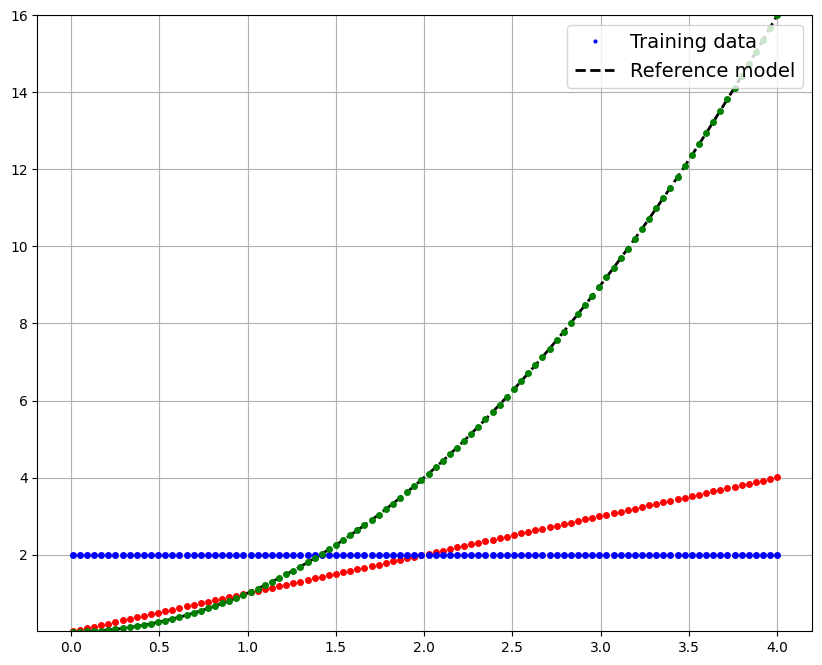

In [6]:
S.plot()
n = len(S.data)

if len(alphas) == n and len(betas) == n:
    for i in range(n):
        alpha = alphas[i] #res.X[i]
        beta  = betas[i]  #math.log(S.data[i].y, res.X[i])
        plt.plot(S.data[i].x, alpha, 'ro', markersize=4, label='alpha')
        plt.plot(S.data[i].x, beta, 'bo', markersize=4, label='beta')
        plt.plot(S.data[i].x, alpha ** beta, 'go', markersize=4, label='beta')

    #plt.ylim(( min(min(alphas), min(betas)), max(max(alphas), max(betas)) ))